# SunbaseData Assignment

In [1]:
#importing pandas before getting started
import pandas as pd

In [2]:
#Loading dataset
df= pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
#First five entries of dataset
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [4]:
df.shape

(100000, 9)

In [8]:
#getting rid of columns Name and CustomerID as they are irrelevant
df= df.drop(['Name', 'CustomerID'], axis= 1)

In [9]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,62.0,Female,New York,1.0,48.76,172.0,0.0
2,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [54]:
# Basic dataset information
print("Dataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  float64
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  float64
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  float64
 6   Churn                       100000 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.3+ MB
None

Summary Statistics:
                 Age  Subscription_Length_Months   Monthly_Bill  \
count  100000.000000               100000.000000  100000.000000   
mean       44.027020                   12.490100      65.053197   
std        15.280283                    6.926461      20.230696   
min      

In [55]:
df['Churn'].value_counts()
#The two values of churn are almost evenly distributed

0.0    50221
1.0    49779
Name: Churn, dtype: int64

In [79]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    # Visualizations
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns

    # Histograms for numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Count plots for categorical columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
        plt.title(f'Count of {col}')
        plt.show()

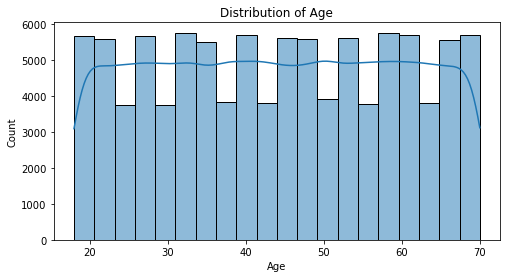

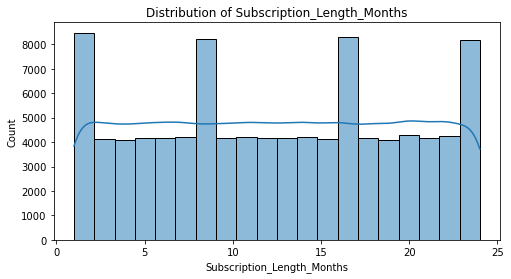

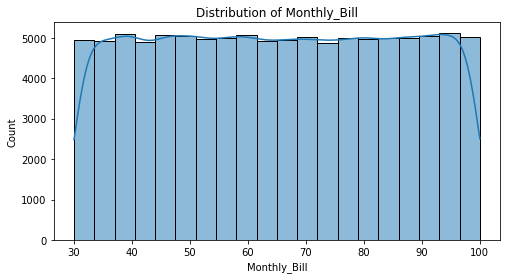

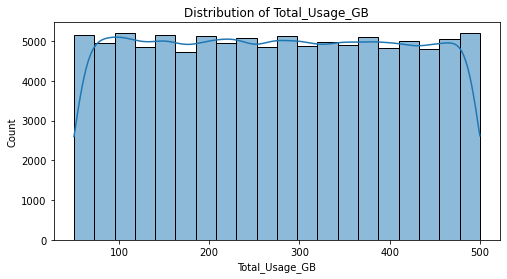

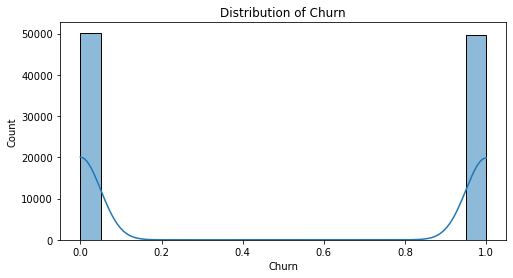

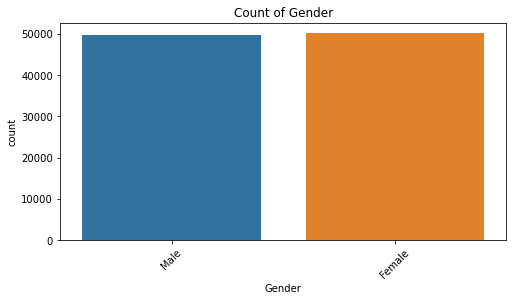

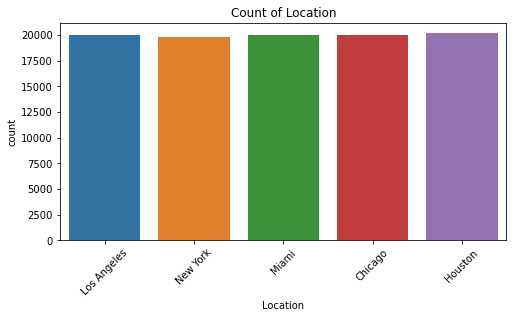

In [80]:
perform_eda(df)

# Let's see coorelation of Gender with Customer churn risk

In [51]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

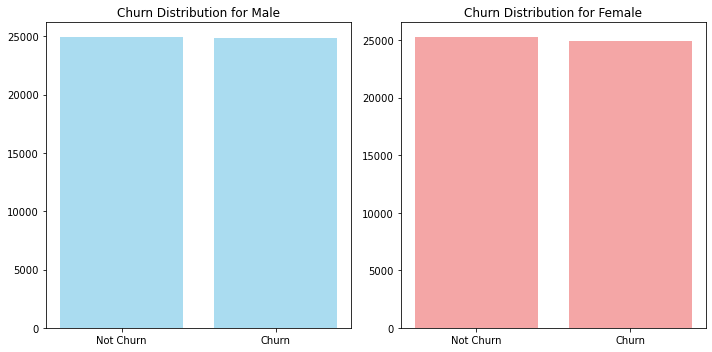

In [52]:
# Separate the data into two DataFrames based on gender
male_churn = df[df['Gender'] == 'Male']['Churn']
female_churn = df[df['Gender'] == 'Female']['Churn']

# Create histograms for Churn based on Gender
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(male_churn, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='skyblue', alpha=0.7)
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.title('Churn Distribution for Male')

plt.subplot(1, 2, 2)
plt.hist(female_churn, bins=[-0.5, 0.5, 1.5], rwidth=0.8, color='lightcoral', alpha=0.7)
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.title('Churn Distribution for Female')
g
plt.tight_layout()
plt.show()

In [53]:
# calculate the feature impotance
global_mean=df['Churn'].mean()
round(global_mean,2)

churn_gender=df.groupby('Gender').Churn.mean()
gender_risk= churn_gender/global_mean
gender_risk

# the differance between rates is small so gender is not important feature

Gender
Female    0.997879
Male      1.002140
Name: Churn, dtype: float64

# Let's see coorelation of Customer age with Customer churn risk

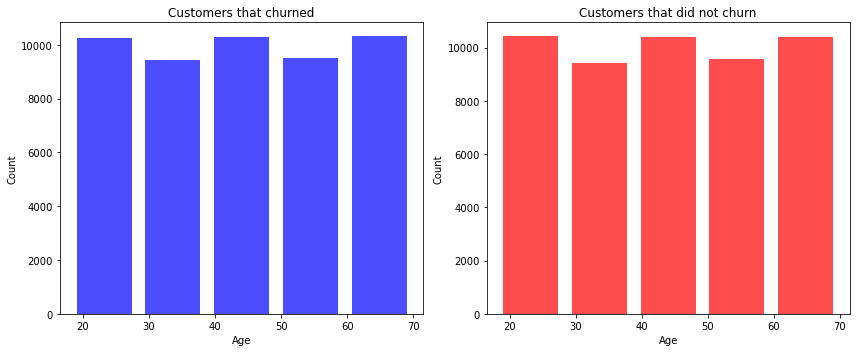

In [84]:
 # Create a histogram plot with 'Age' on the x-axis and 'Churn' as the hue
df_churned= df[df['Churn']==1]['Age']
df_not_churned= df[df['Churn']==0]['Age']

# Create subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_churned, bins=5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Customers that churned')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(df_not_churned, bins=5, rwidth=0.8, color='red', alpha=0.7)
plt.title('Customers that did not churn')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

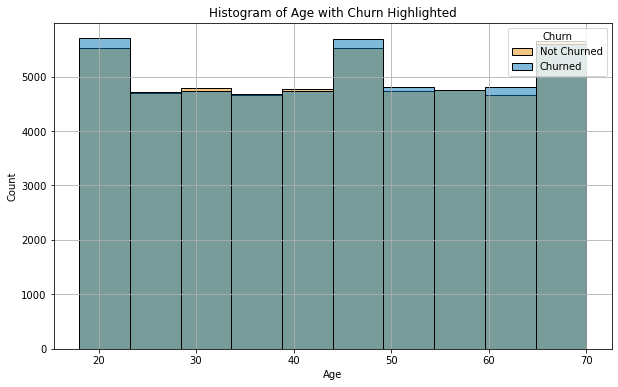

In [88]:
# Create a histogram plot with 'Age' on the x-axis and 'Churn' as the hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Churn', bins=10, palette='colorblind')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age with Churn Highlighted')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()

# Coorelation of Customer location with Churn risk

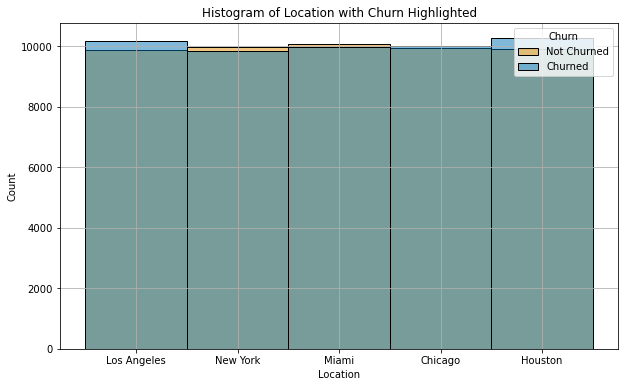

In [87]:
# Create a histogram plot with 'Location' on the x-axis and 'Churn' as the hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Location', hue='Churn', bins=10, palette='colorblind')

# Customize the plot
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Histogram of Location with Churn Highlighted')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()

# Coorelation of Customer Subscription Length with Churn risk

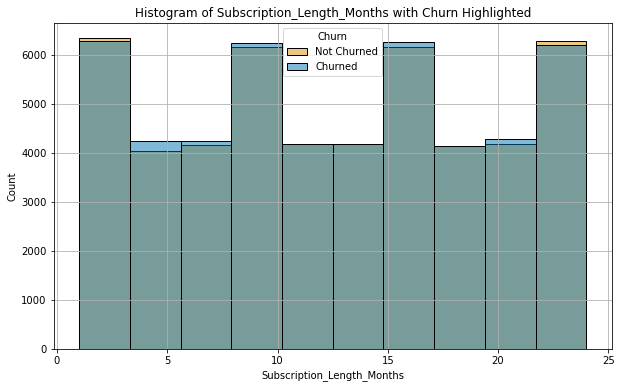

In [89]:
# Create a histogram plot with 'Subscription Length' on the x-axis and 'Churn' as the hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Subscription_Length_Months', hue='Churn', bins=10, palette='colorblind')

# Customize the plot
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Count')
plt.title('Histogram of Subscription_Length_Months with Churn Highlighted')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()

# Coorelation of Customer Monthly Bill with Churn risk

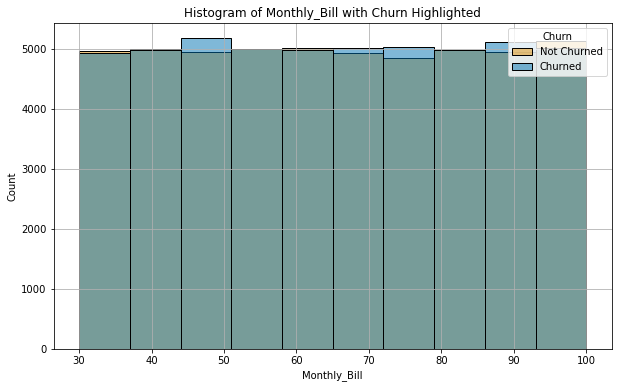

In [91]:
# Create a histogram plot with 'Monthly Bill' on the x-axis and 'Churn' as the hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly_Bill', hue='Churn', bins=10, palette='colorblind')

# Customize the plot
plt.xlabel('Monthly_Bill')
plt.ylabel('Count')
plt.title('Histogram of Monthly_Bill with Churn Highlighted')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()

# Coorelation of Customer Total GB Usage with Churn risk

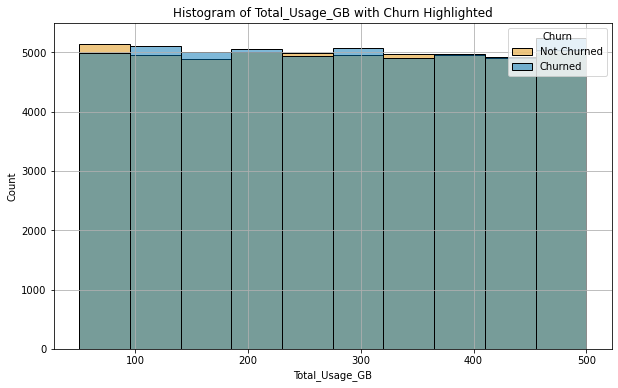

In [94]:
# Create a histogram plot with 'Total_Usage_GB' on the x-axis and 'Churn' as the hue
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Usage_GB', hue='Churn', bins=10, palette='colorblind')

# Customize the plot
plt.xlabel('Total_Usage_GB')
plt.ylabel('Count')
plt.title('Histogram of Total_Usage_GB with Churn Highlighted')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Show the plot
plt.grid(True)
plt.show()

# Correlation Matrix for Numeric Columns

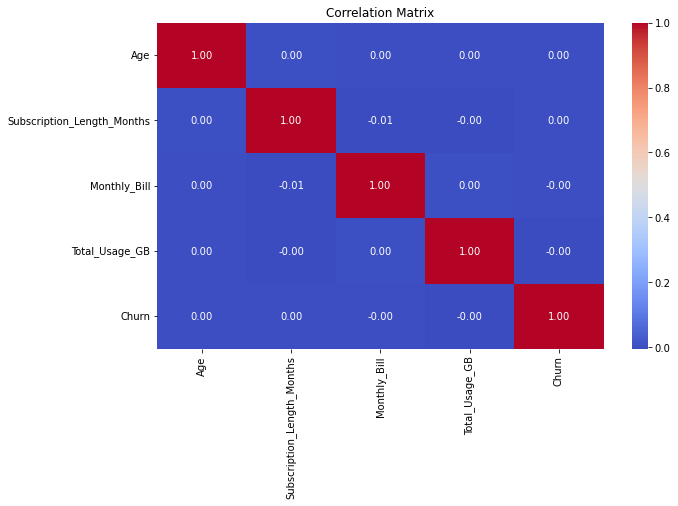

In [93]:
 # Correlation matrix (if applicable)
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Mutual information — analysis of linear and nonlinear relationships

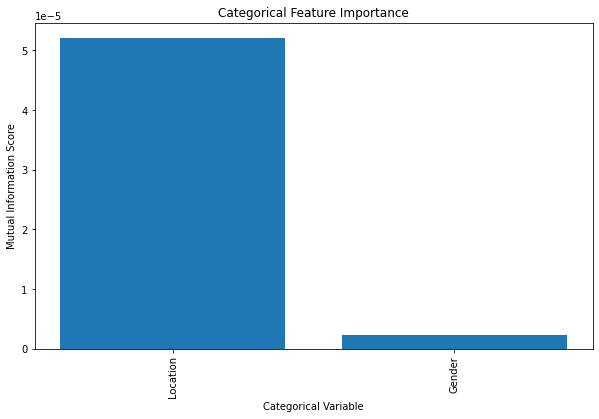

In [112]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(categorical_serie, target):
    return mutual_info_score(categorical_serie, target)

# Select categorical variables excluding 'Churn'
categorical_variables = df.select_dtypes(include=object)

# Compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(lambda col: compute_mutual_information(col, df['Churn']))

# Sort the feature importance scores in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Visualize feature importance using a bar plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.index, feature_importance.values)
plt.xticks(rotation=90)
plt.xlabel('Categorical Variable')
plt.ylabel('Mutual Information Score')
plt.title('Categorical Feature Importance')
plt.show()


In [113]:
# Performing one-hot encoding of Gender column
df1 = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [114]:
# Perform one-hot encoding of Location coulmn
df2 = pd.get_dummies(df1, columns=['Location'])

In [115]:
df2.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63.0,17.0,73.36,236.0,0.0,1,0,0,1,0,0
1,62.0,1.0,48.76,172.0,0.0,0,0,0,0,0,1
2,24.0,5.0,85.47,460.0,0.0,0,0,0,1,0,0
3,36.0,3.0,97.94,297.0,1.0,0,0,0,0,1,0
4,46.0,19.0,58.14,266.0,0.0,0,0,0,0,1,0


# Feature engineering

In [116]:
#Adding column Monthly bill per GB, and total bill paid to see if some customers are paying more, resulting in churn
df2['Monthly_Bill_Per_GB']= df2['Total_Usage_GB']/df2['Monthly_Bill']
df2['Total_Bill_Paid']= df2['Subscription_Length_Months']*df2['Monthly_Bill']

In [117]:
df2.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Monthly_Bill_Per_GB,Total_Bill_Paid
0,63.0,17.0,73.36,236.0,0.0,1,0,0,1,0,0,3.217012,1247.12
1,62.0,1.0,48.76,172.0,0.0,0,0,0,0,0,1,3.527482,48.76
2,24.0,5.0,85.47,460.0,0.0,0,0,0,1,0,0,5.382005,427.35
3,36.0,3.0,97.94,297.0,1.0,0,0,0,0,1,0,3.032469,293.82
4,46.0,19.0,58.14,266.0,0.0,0,0,0,0,1,0,4.575163,1104.66


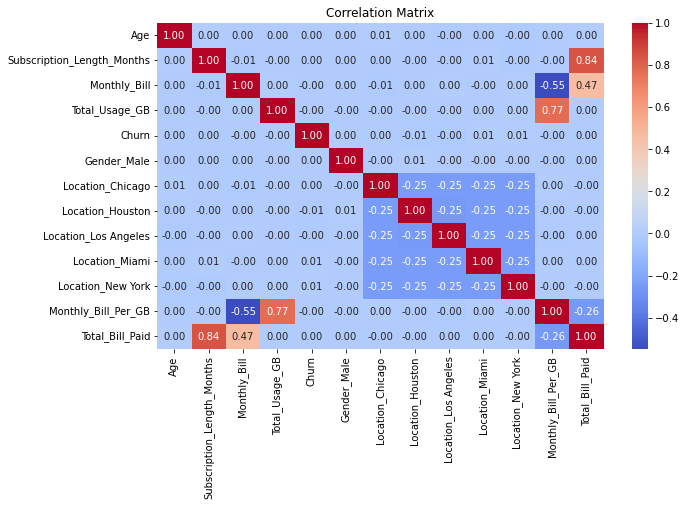

In [118]:
 # Correlation matrix (if applicable)
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Machine Learning Models to predict Churn risk

Splitting data into training and test set

In [129]:
from sklearn.model_selection import train_test_split

X = df2[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Gender_Male', 'Location_Chicago', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York', 'Monthly_Bill_Per_GB', 'Total_Bill_Paid']]
y = df2['Churn']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Machine learning models: Logistic Regression, Decision Tree, Random Forest Classifier

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define hyperparameter grids for each model
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

tree_param_grid = {
    'max_depth': [None, 10, 20, 30]
}

rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
}

# Initialize models
logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV objects for each model
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid, cv=5, scoring='accuracy')
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_param_grid, cv=5, scoring='accuracy')
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV objects to the training data
logistic_grid_search.fit(X_train, y_train)
tree_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for each model
best_logistic_params = logistic_grid_search.best_params_
best_tree_params = tree_grid_search.best_params_
best_rf_params = rf_grid_search.best_params_

# Evaluate the models with the best hyperparameters on the test data
best_logistic_model = logistic_grid_search.best_estimator_
best_tree_model = tree_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

logistic_test_predictions = best_logistic_model.predict(X_test)
tree_test_predictions = best_tree_model.predict(X_test)
rf_test_predictions = best_rf_model.predict(X_test)

#Logistic regression scores
logistic_accuracy = accuracy_score(y_test, logistic_test_predictions)
logistic_f1_score = f1_score(y_test, logistic_test_predictions)
logistic_recall_score = recall_score(y_test, logistic_test_predictions)
logistic_precision_score = precision_score(y_test, logistic_test_predictions)
logistic_confusion = confusion_matrix(y_test, logistic_test_predictions)

#Decision Tree scores
tree_accuracy = accuracy_score(y_test, tree_test_predictions)
tree_f1_score = f1_score(y_test, tree_test_predictions)
tree_recall_score= recall_score(y_test, tree_test_predictions)
tree_precision_score = precision_score(y_test, tree_test_predictions)
tree_confusion = confusion_matrix(y_test, tree_test_predictions)

#Random Forest scores
rf_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_f1_score = f1_score(y_test, rf_test_predictions)
rf_recall_score = recall_score(y_test, rf_test_predictions)
rf_precision_score = precision_score(y_test, rf_test_predictions)
rf_confusion = confusion_matrix(y_test, rf_test_predictions)

print("Logistic Regression:")
print("Best Hyperparameters:", best_logistic_params)
print("Accuracy:", logistic_accuracy)
print("F1 Score:", logistic_f1_score)
print("Recall Score:", logistic_recall_score)
print("Precision Score:", logistic_precision_score)
print("Confusion Matrix:", logistic_confusion)
print("--------------------------------")

print("Decision Tree:")
print("Best Hyperparameters:", best_tree_params)
print("Accuracy:", tree_accuracy)
print("F1 Score:", tree_f1_score)
print("Recall Score:", tree_recall_score)
print("Precision Score:", tree_precision_score)
print("Confusion Matrix:", tree_confusion)
print("--------------------------------")

print("Random Forest Classifier")
print("Best Hyperparameters:", best_rf_params)
print("Accuracy:", rf_accuracy)
print("F1 Score:", rf_f1_score)
print("Recall Score:", rf_recall_score)
print("Precision Score:", rf_precision_score)
print("Confusion Matrix:", rf_confusion)
print("--------------------------------")

Logistic Regression:
Best Hyperparameters: {'C': 10}
Accuracy: 0.50055
F1 Score: 0.3731408848446815
Recall Score: 0.29966737224070156
Precision Score: 0.49434652477552377
Confusion Matrix: [[7038 3041]
 [6948 2973]]
--------------------------------
Decision Tree:
Best Hyperparameters: {'max_depth': 30}
Accuracy: 0.49355
F1 Score: 0.5124897723444193
Recall Score: 0.5366394516681786
Precision Score: 0.49042004421518054
Confusion Matrix: [[4547 5532]
 [4597 5324]]
--------------------------------
Random Forest Classifier
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.50165
F1 Score: 0.45221214619400935
Recall Score: 0.41467593992541074
Precision Score: 0.49722020788010635
Confusion Matrix: [[5919 4160]
 [5807 4114]]
--------------------------------


# Using Neural Networks

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

# Define the architecture of the neural network
model = keras.Sequential([
    layers.Input(shape=(12,)),  # Input layer (input_dim should be the number of features)
    layers.Dense(8, activation='relu'),  # Hidden layer with 8 units and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',  # You can choose different optimizers like 'adam', 'sgd', etc.
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])  # Additional metrics to track during training

# Display the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train,  # Replace with your training data and labels
                    epochs=50,  # Number of training epochs
                    batch_size=32,  # Batch size for mini-batch gradient descent
                    validation_split=0.2)  # Percentage of training data used for validation

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


y_pred = model.predict(X_test)

# Convert predicted probabilities to binary labels (0 or 1)
y_pred_binary = (y_pred).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)


# Taking in Input from user and Predicting Customer Churn Risk. We have chosen Decision tree as it is the best model so far.

In [140]:
def predict_churn_risk(model):
    # Get input features from the user
    age = float(input("Enter Age: "))
    subscription_length_months = float(input("Enter Subscription Length in Months: "))
    monthly_bill = float(input("Enter Monthly Bill Amount: "))
    total_usage_gb = float(input("Enter Total Usage in GB: "))
    gender = input("Enter Gender (Male/Female): ")
    location = input("Enter Location: ")
    
    gender_male= 0
    
    location_chicago=0
    location_houston=0
    location_LosAngeles=0
    location_Miami= 0
    location_NewYork= 0
    
    
    if(gender=='Male'):
        gender_male= 1
    else:
        gender_male= 0
    
    if (location== 'Chicago'):
        location_chicago= 1
    elif (location== 'Houston'):
        location_houston= 1
    elif (location== 'Los Angeles'):
        location_LosAngeles= 1
    elif (location== 'Miami'):
        location_Miami= 1
    elif (location== 'New York'):
        location_NewYork= 1

    # Create a dictionary to hold the input features
    input_data = {
        'Age': [age],
        'Subscription_Length_Months': [subscription_length_months],
        'Monthly_Bill': [monthly_bill],
        'Total_Usage_GB': [total_usage_gb],
        'Gender_Male': [gender_male],
        'Location_Chicago': [location_chicago],
        'Location_Houston': [location_houston],
        'Location_Los Angeles': [location_LosAngeles],
        'Location_Miami': [location_Miami],
        'Location_New York': [location_NewYork],
        'Monthly_Bill_Per_GB': [total_usage_gb/monthly_bill],
        'Total_Bill_Paid': [subscription_length_months*monthly_bill]
    }
    
    # Create a DataFrame from the input data
    input_df = pd.DataFrame(input_data)
    
    
    # Make predictions using the trained model
    churn_risk_prediction = model.predict(input_df)
    
    # Return the churn risk prediction
    return churn_risk_prediction[0]


churn_risk = predict_churn_risk(best_tree_model)
print(f"Churn Risk: {churn_risk}")


Enter Age: 45
Enter Subscription Length in Months: 23
Enter Monthly Bill Amount: 56
Enter Total Usage in GB: 100
Enter Gender (Male/Female): Female
Enter Location: Chicago
Churn Risk: 1.0
